## Week 8 - task 3 TO DO

In [1]:
import tensorflow_probability as tfp
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Suppose the number of lions observed at a camera trap in a given day follows a Poisson distribution with rate 1.
tfd = tfp.distributions
lions = tfd.Poisson(rate=1)

2023-06-29 19:34:17.931974: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-29 19:34:18.505076: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10794 MB memory:  -> device: 0, name: Tesla K80, pci bus id: 0001:00:00.0, compute capability: 3.7


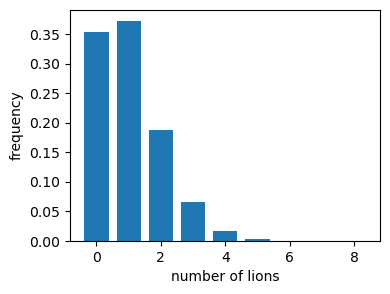

In [3]:
#We can now sample from this distribution to explore how the number of lions varies across different days.
# sample from the distribution for 10 years worth of samples
n_lions = lions.sample(3650)

# plot the histogram of number of lions each day
plt.figure(figsize=(4,3))
plt.hist(n_lions.numpy(), bins = np.arange(10),rwidth=0.75,density=True,align='left')
plt.xlabel('number of lions')
plt.ylabel('frequency')
plt.show()

The number of wildebeest present at the location also follows a Poisson distribution, however the number of wildebeest that are observed on a given day depends on the number of lions that are also present

In [4]:
# we create a joint distribution where the output from the first distribution
# is passed to the second distribution using a lambda function
joint = tfd.JointDistributionSequential([tfd.Poisson(rate=1,name='n_lions'),
lambda n_lions : tfd.Poisson(rate=tf.math.exp(4-n_lions),name='n_wild')])

In [5]:
#Over 20 days, the following observations are made:

Number_of_lions = [0, 2, 1, 1, 2, 3, 6, 4, 5, 6, 7, 2, 0, 6, 5, 6, 2, 1, 6, 5]
Number_of_Wildebeest: [64, 0, 16, 14, 3, 1, 0, 0, 0, 0, 0, 1, 58, 0, 0, 0, 6, 10, 0, 0]

#Using the same joint distribution as we used in the example above, find the maximum likelihood estimate
#for 𝛼 given these data using the L-BFGS optimizer